# 一、Adaboost多分类

## 1. 多分类的建模

### 1.1 导包

In [1]:
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz

### 1.2 加载数据

In [2]:
X,y = datasets.load_iris(return_X_y = True) # 150个样本
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1024) 
X_train.shape

(120, 4)

In [3]:
y_train

array([1, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 0, 2, 2, 0, 1, 2, 2, 2,
       0, 0, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 0, 0, 2, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 2, 2, 2, 2, 1, 0, 1, 0, 2, 2, 0, 2, 2, 2, 1,
       2, 1, 0, 2, 0, 0, 2, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 2, 0, 2, 2,
       1, 0, 1, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 2, 1, 2, 1, 2])

### 1.3 算法建模

In [4]:
# 多分类问题，不是+1、-1
# 类别 0,1,2
ada = AdaBoostClassifier(n_estimators=3,algorithm='SAMME',learning_rate=1.0)
ada.fit(X_train,y_train) # 算法，工作：从 X_train---y_train寻找规律

y_ = ada.predict(X_test)
proba_ = ada.predict_proba(X_test)
accuracy = ada.score(X_test,y_test)
print('--------------------算法准确率：',accuracy)
display(y_,proba_)

--------------------算法准确率： 0.9666666666666667


array([1, 0, 2, 2, 0, 0, 1, 2, 1, 0, 0, 0, 1, 2, 1, 0, 1, 0, 1, 0, 2, 0,
       1, 0, 2, 1, 2, 2, 2, 2])

array([[0.32847505, 0.41712192, 0.25440303],
       [0.39095163, 0.35353342, 0.25551495],
       [0.25179489, 0.29838261, 0.44982251],
       [0.25179489, 0.29838261, 0.44982251],
       [0.39095163, 0.35353342, 0.25551495],
       [0.39095163, 0.35353342, 0.25551495],
       [0.32847505, 0.41712192, 0.25440303],
       [0.25179489, 0.29838261, 0.44982251],
       [0.32847505, 0.41712192, 0.25440303],
       [0.39095163, 0.35353342, 0.25551495],
       [0.39095163, 0.35353342, 0.25551495],
       [0.39095163, 0.35353342, 0.25551495],
       [0.32847505, 0.41712192, 0.25440303],
       [0.25179489, 0.29838261, 0.44982251],
       [0.25440303, 0.41712192, 0.32847505],
       [0.39095163, 0.35353342, 0.25551495],
       [0.32847505, 0.41712192, 0.25440303],
       [0.39095163, 0.35353342, 0.25551495],
       [0.25440303, 0.41712192, 0.32847505],
       [0.39095163, 0.35353342, 0.25551495],
       [0.25179489, 0.29838261, 0.44982251],
       [0.39095163, 0.35353342, 0.25551495],
       [0.

In [5]:
print(y_)
proba_.argmax(axis=1)

[1 0 2 2 0 0 1 2 1 0 0 0 1 2 1 0 1 0 1 0 2 0 1 0 2 1 2 2 2 2]


array([1, 0, 2, 2, 0, 0, 1, 2, 1, 0, 0, 0, 1, 2, 1, 0, 1, 0, 1, 0, 2, 0,
       1, 0, 2, 1, 2, 2, 2, 2], dtype=int64)

### 1.4 可视化

In [6]:
iris = datasets.load_iris()
fn = iris['feature_names']
fn

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
ada[0]

DecisionTreeClassifier(max_depth=1, random_state=1307628975)

#### 1.4.1 第一棵树

In [9]:
# 第一棵树
# 这棵树，简单的树，树的深度：1
# Adaboosting里面都是简单的树
dot_data = tree.export_graphviz(ada[0],filled=True)
graph = graphviz.Source(dot_data)
graph.render('./第一棵树',format='png')

'第一棵树.png'

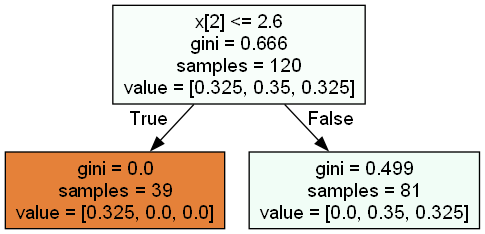

In [17]:
# 拆分后的gini系数
0 * 39/120 + 0.499 * 81/120

0.336825

In [10]:
dot_data = tree.export_graphviz(ada[0],filled=True,feature_names=fn)
graph = graphviz.Source(dot_data)
graph.render('./第一棵树fn',format='png')

'第一棵树fn.png'

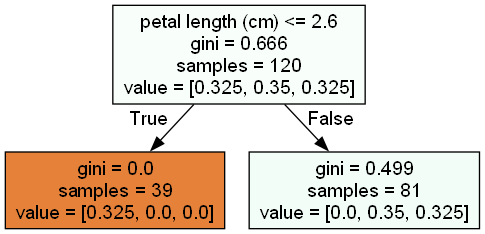

#### 1.4.1 第二棵树

In [11]:
# 第二棵树
# 这棵树，简单的树，树的深度：1
# Adaboosting里面都是简单的树
dot_data = tree.export_graphviz(ada[1],filled=True)
graphviz.Source(dot_data)
graph = graphviz.Source(dot_data)
graph.render('./第二棵树',format='png')

'第二棵树.png'

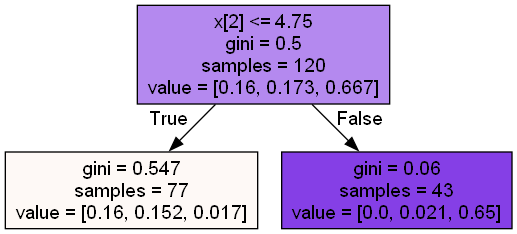

#### 1.4.3 第三棵树

In [12]:
# 第三棵树
# 这棵树，简单的树，树的深度：1
# Adaboosting里面都是简单的树
dot_data = tree.export_graphviz(ada[2],filled=True)
graphviz.Source(dot_data)
graph = graphviz.Source(dot_data)
graph.render('./第三棵树',format='png')

'第三棵树.png'

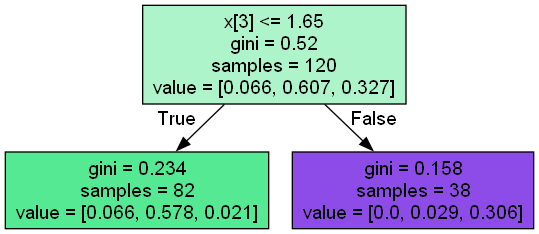

## 2. 构建第一棵树

### 2.1 未分裂前gini系数计算

#### 2.1.1 方法一

In [13]:
# 等权重
w1 = np.full(shape = 120,fill_value=1/120)

In [14]:
gini = 0
for i in range(3):
    cond = y_train == i
    p = w1[cond].sum() # 某个类别的概率
    gini += p * (1 -p)
print(np.round(gini,3))

0.666


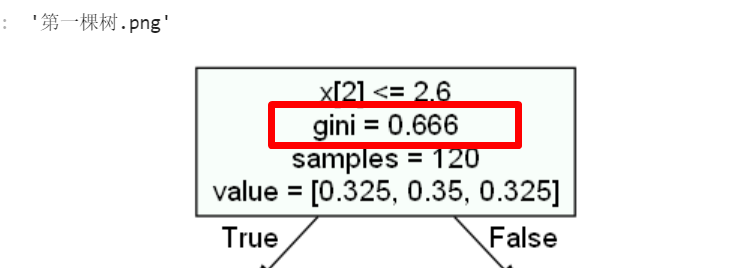

#### 2.1.2 方法二

In [15]:
w1 = np.full(shape = 120,fill_value=1/120)

gini = 1
for i in range(3):
    cond = y_train == i
    p = w1[cond].sum() # 某个类别的概率
    print(p)
    gini -= p**2  # ！！！！！！！！！！！！！！！
print(np.round(gini,3))

0.3250000000000002
0.35000000000000003
0.3250000000000002
0.666


### 2.2 拆分条件计算

In [16]:
best_split = {}
best_split_backup = {}
lower_gini = 1
# 4个特征，选哪一个？每一个特征，是不是，都要进行计算
cols = X_train.shape[1]
samples = X_train.shape[0]
for col in range(cols): # 列数
    for i in range(samples):  # 行数，找裂分点的具体数值
        X = X_train[:,col].copy() # X内是无序的，找裂分点需要排序
        X.sort()
        split = X[i:i+2].mean()
        cond = X_train[:,col] < split
        left = y_train[cond]
        right = y_train[~cond]
        left_w1 = w1[cond]/w1[cond].sum()  # 归一化
        right_w1 = w1[~cond]/w1[~cond].sum()
        gini_left = 1
        gini_right = 1
        for target in np.unique(y_train): # 0,1,2
            cond1 = left == target
            p1 = left_w1[cond1].sum() # 左边中，某个类别的概率
            gini_left -= p1**2
            cond2 = right == target
            p2 = right_w1[cond2].sum() # 右边分组中，某个类别的概率
            gini_right -= p2**2
        # 计算划分后整体的 gini系数 left + right
        left_p = w1[cond].sum()
        right_p = 1 - left_p
        gini = left_p * np.round(gini_left,3) + right_p * np.round(gini_right,3)
        if gini < lower_gini:
            lower_gini = gini
            best_split.clear()
            best_split['X[%d]'%(col)] = np.round(split,2)
print(lower_gini,best_split)

0.33682499999999993 {'X[2]': 2.6}


In [ ]:
# 若 w1[cond].sum 和 cond.sum()/cond.size 一样  
# 前提：每个样本权重一样

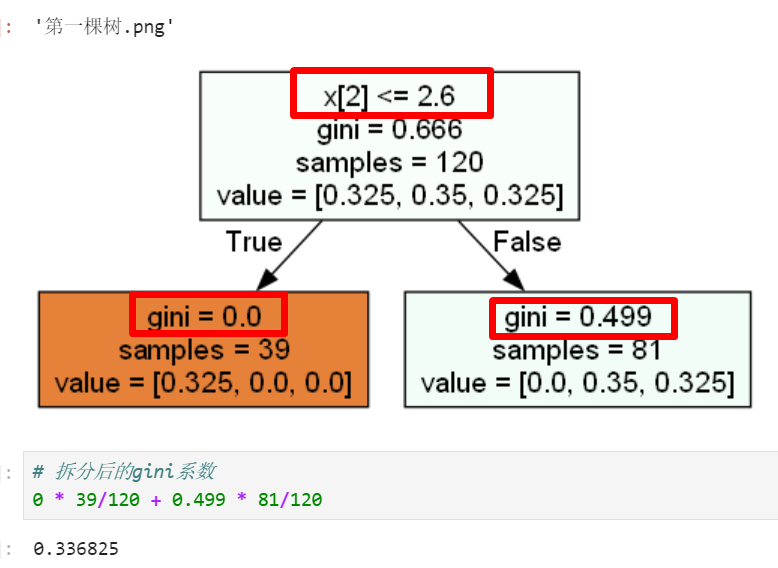

### 2.3 误差率计算

In [18]:
# 计算误差率
y1_ = ada[0].predict(X_train) # 预测结果
print(y1_)

e1 = ((y_train != y1_)).mean() # 误差，适用前提：权重相同

print('第一棵树误差率是：',e1)
print('算法的误差是：',ada.estimator_errors_)

[1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1
 1 1 0 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0
 1 1 0 1 1 1 1 1 1]
第一棵树误差率是： 0.325
算法的误差是： [0.325      0.18993352 0.1160323 ]


In [19]:
# 更普遍的方法
# 计算误差率
y1_ = ada[0].predict(X_train) # 预测结果
print(y1_)

cond = y_train != y1_ # 误差
e1 = w1[cond].sum()

print('第一棵树误差率是：',e1)
print('算法的误差是：',ada.estimator_errors_)

[1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1
 1 1 0 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0
 1 1 0 1 1 1 1 1 1]
第一棵树误差率是： 0.3250000000000002
算法的误差是： [0.325      0.18993352 0.1160323 ]


### 2.4 弱分类器的权重【多分类】

- 二分类的权重计算是简化版：
- 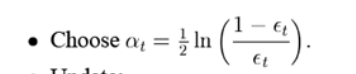

In [20]:
learning_rate = 1.0
num = 3 # 三分类
a1 = learning_rate * (np.log((1-e1)/e1) + np.log(num - 1))
print('手动计算算法权重是：',a1)

print('算法返回的分类器权重是：',ada.estimator_weights_)

手动计算算法权重是： 1.424034689102737
算法返回的分类器权重是： [1.42403469 2.14358936 2.72369906]


### 2.5 样本权重更新【多分类】

In [21]:
# 更新样本的权重
w2 = w1 * np.exp(a1 * (y_train != y1_))  
                        # 不相等，预测错误，true-->1，权重增大
                        # 相等，预测正确 false-->0 ，e^0=1，权重不变，归一化时会降低
w2 /= w2.sum()
w2

array([0.00411523, 0.01709402, 0.01709402, 0.01709402, 0.00411523,
       0.00411523, 0.00411523, 0.00411523, 0.00411523, 0.00411523,
       0.00411523, 0.00411523, 0.00411523, 0.01709402, 0.00411523,
       0.01709402, 0.01709402, 0.00411523, 0.00411523, 0.01709402,
       0.01709402, 0.01709402, 0.00411523, 0.00411523, 0.00411523,
       0.01709402, 0.01709402, 0.00411523, 0.01709402, 0.00411523,
       0.01709402, 0.01709402, 0.00411523, 0.00411523, 0.01709402,
       0.00411523, 0.00411523, 0.01709402, 0.00411523, 0.00411523,
       0.00411523, 0.00411523, 0.00411523, 0.00411523, 0.00411523,
       0.00411523, 0.00411523, 0.00411523, 0.00411523, 0.00411523,
       0.00411523, 0.01709402, 0.01709402, 0.01709402, 0.01709402,
       0.00411523, 0.00411523, 0.00411523, 0.00411523, 0.01709402,
       0.01709402, 0.00411523, 0.01709402, 0.01709402, 0.01709402,
       0.00411523, 0.01709402, 0.00411523, 0.00411523, 0.01709402,
       0.00411523, 0.00411523, 0.01709402, 0.00411523, 0.01709

## 3. 构建第二棵树

### 3.1 gini系数计算

In [22]:
gini = 1
for i in range(3):
    cond = y_train == i
    p = w2[cond].sum() # 某个类别的概率
#     print(p)
    gini -= p**2
print(np.round(gini,3))

0.5


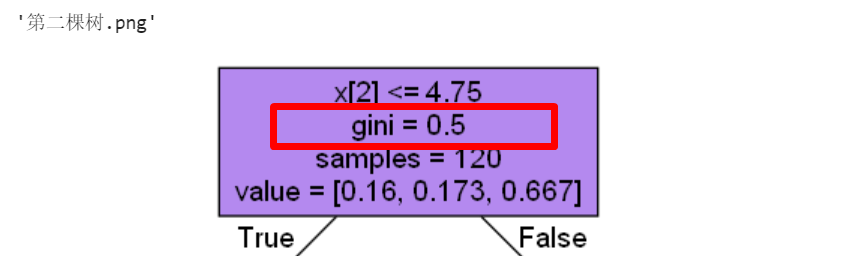

###a1 3.2 拆分条件

In [23]:
best_split = {}
lower_gini = 1
# 4个特征，选哪一个？每一个特征，是不是，都要进行计算
cols = X_train.shape[1]
samples = X_train.shape[0]
for col in range(cols):
    for i in range(samples):
        X = X_train[:,col].copy() # 无序
        X.sort()
        split = X[i:i+2].mean()
        cond = X_train[:,col] < split
        left = y_train[cond]
        right = y_train[~cond]
        left_w2 = w2[cond]/w2[cond].sum()
        right_w2 = w2[~cond]/w2[~cond].sum()
        gini_left = 1
        gini_right = 1
        for target in np.unique(y_train):# 0,1,2
            cond1 = left == target
            p1 = left_w2[cond1].sum() # 左边中，某个类别的概率
            gini_left -= p1**2
            cond2 = right == target
            p2 = right_w2[cond2].sum() # 右边分组中，某个类别的概率
            gini_right -= p2**2
        # 计算划分后整体的gini系数 left + right
        left_p = w2[cond].sum()
        right_p = 1 - left_p
        gini = left_p * np.round(gini_left,3) + right_p * np.round(gini_right,3)
        if gini < lower_gini:
            lower_gini = gini
            best_split.clear()
            best_split['X[%d]'%(col)] = np.round(split,2)
print(lower_gini,best_split)

0.22063754352643244 {'X[2]': 4.75}


In [24]:
# 不能这样算分裂后的gini系数，权重改变了，不再是等权重
0.547*77/120 + 0.06*43/120

0.37249166666666667

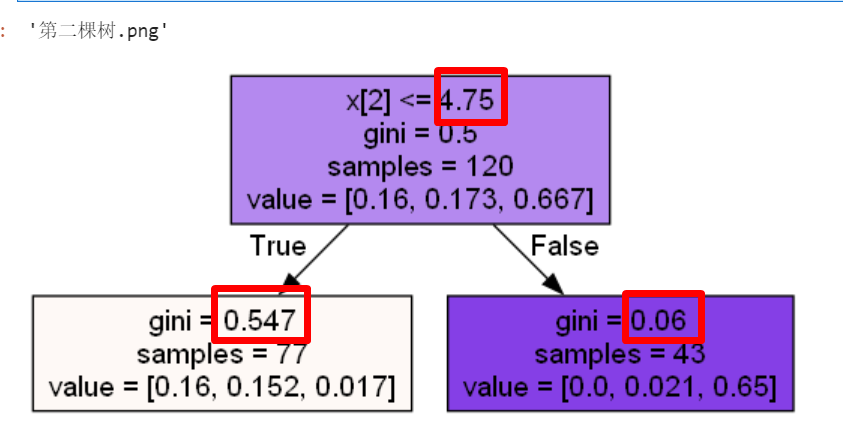

In [25]:
cond = X_train[:,2] <= 4.75
p1 = w2[cond].sum()  # 这是 <=4.75 的数据的权重
p2 = 1 - p1
print(p1,p2)
p1 * 0.547 + p2 * 0.06

0.3298512187401077 0.6701487812598923


0.22063754352643244

In [26]:
cond.sum() # <=4.75 的数据有77个

77

In [27]:
77/120  # 这样算出来的是等权重下的占比，而实际上调整权重后，占比下降为0.3298512187401077

0.6416666666666667

### 3.3 误差计算

In [28]:
# 计算误差率
y2_ = ada[1].predict(X_train) #预测结果
print(y2_)

cond = y_train != y2_#误差
e2 = w2[cond].sum()

print('第二棵树误差率是：',e2)
print('算法的误差是：',ada.estimator_errors_)

[0 2 2 2 0 2 0 0 0 0 0 0 0 2 0 2 2 0 0 2 2 2 0 0 0 2 2 0 2 0 2 2 0 0 2 0 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 0 0 0 2 2 0 2 2 2 0 0 0 0 2 0 0 2 0
 2 0 0 0 0 0 2 0 0 0 2 0 2 2 2 0 2 2 0 2 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 2 2 0 2 0 2]
第二棵树误差率是： 0.1899335232668567
算法的误差是： [0.325      0.18993352 0.1160323 ]


### 3.4 弱分类器的权重

In [30]:
learning_rate = 1.0
num = 3 # 三分类
a2 = learning_rate * (np.log((1-e2)/e2) + np.log(num - 1))

print('手动计算算法权重是：',a2)
print('算法返回的分类器权重是：',ada.estimator_weights_)

手动计算算法权重是： 2.143589361503587
算法返回的分类器权重是： [1.42403469 2.14358936 2.72369906]


### 3.5 样本权重更新

In [31]:
# 更新样本的权重
w3 = w2 * np.exp(a2 * (y_train != y2_))
w3 /= w3.sum()
w3

array([0.01444444, 0.007034  , 0.007034  , 0.007034  , 0.01444444,
       0.01444444, 0.01444444, 0.01444444, 0.00169337, 0.01444444,
       0.01444444, 0.01444444, 0.00169337, 0.007034  , 0.00169337,
       0.007034  , 0.007034  , 0.00169337, 0.01444444, 0.007034  ,
       0.007034  , 0.007034  , 0.00169337, 0.00169337, 0.01444444,
       0.007034  , 0.007034  , 0.01444444, 0.007034  , 0.01444444,
       0.007034  , 0.007034  , 0.01444444, 0.01444444, 0.007034  ,
       0.00169337, 0.00169337, 0.007034  , 0.00169337, 0.01444444,
       0.00169337, 0.01444444, 0.00169337, 0.01444444, 0.01444444,
       0.01444444, 0.00169337, 0.01444444, 0.00169337, 0.01444444,
       0.00169337, 0.007034  , 0.007034  , 0.007034  , 0.007034  ,
       0.01444444, 0.00169337, 0.01444444, 0.00169337, 0.007034  ,
       0.007034  , 0.00169337, 0.007034  , 0.007034  , 0.007034  ,
       0.01444444, 0.06      , 0.01444444, 0.00169337, 0.007034  ,
       0.00169337, 0.00169337, 0.007034  , 0.01444444, 0.00703

## 4. 构建第三棵树

### 4.1 gini系数计算

In [32]:
gini = 1
for i in range(3):
    cond = y_train == i
    p = w3[cond].sum() # 某个类别的概率
#     print(p)
    gini -= p**2
print(np.round(gini,3))

0.52


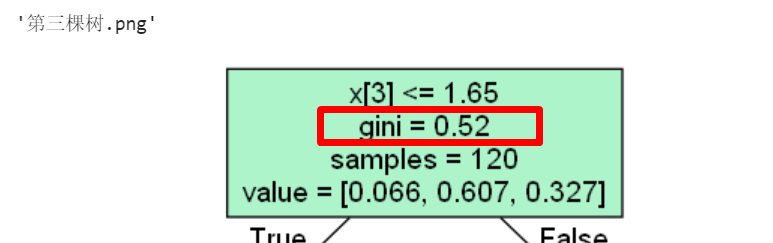

### 4.2 拆分条件计算

In [33]:
best_split = {}
lower_gini = 1
# 4个特征，选哪一个？每一个特征，是不是，都要进行计算
cols = X_train.shape[1]
samples = X_train.shape[0]
for col in range(cols):
    for i in range(samples):
        X = X_train[:,col].copy() # 无序
        X.sort()
        split = X[i:i+2].mean()
        cond = X_train[:,col] < split
        left = y_train[cond]
        right = y_train[~cond]
        left_w3 = w3[cond]/w3[cond].sum()
        right_w3 = w3[~cond]/w3[~cond].sum()
        gini_left = 1
        gini_right = 1
        for target in np.unique(y_train):# 0,1,2
            cond1 = left == target
            p1 = left_w3[cond1].sum() # 左边中，某个类别的概率
            gini_left -= p1**2
            cond2 = right == target
            p2 = right_w3[cond2].sum() # 右边分组中，某个类别的概率
            gini_right -= p2**2
        # 计算划分后整体的gini系数 left + right
        left_p = w3[cond].sum()
        right_p = 1 - left_p
        gini = left_p * np.round(gini_left,3) + right_p * np.round(gini_right,3)
        if gini < lower_gini:
            lower_gini = gini
            best_split.clear()
            best_split['X[%d]'%(col)] = np.round(split,2)
print(lower_gini,best_split)

0.20853401068125574 {'X[3]': 1.65}


### 4.3 误差计算

In [34]:
# 计算误差率
y3_ = ada[2].predict(X_train) #预测结果
print(y3_)

cond = y_train != y3_#误差
e3 = w3[cond].sum()

print('第三棵树误差率是：',e3)
print('算法的误差是：',ada.estimator_errors_)

[1 2 2 2 1 1 1 1 1 1 1 1 1 2 1 2 2 1 1 2 2 2 1 1 1 2 2 1 2 1 2 2 1 1 2 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 2 2 1 2 2 2 1 2 1 1 1 1 1 2 1
 2 1 1 1 1 1 2 1 1 1 2 1 2 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1
 1 1 1 2 2 1 2 1 2]
第三棵树误差率是： 0.11603230428552827
算法的误差是： [0.325      0.18993352 0.1160323 ]


### 4.4 弱分类器权重

In [35]:
learning_rate = 1.0
num = 3 # 三分类
a3 = learning_rate * (np.log((1-e3)/e3) + np.log(num - 1))

print('手动计算算法权重是：',a3)
print('算法返回的分类器权重是：',ada.estimator_weights_)

手动计算算法权重是： 2.72369906166382
算法返回的分类器权重是： [1.42403469 2.14358936 2.72369906]


### 4.5 样本权重更新

In [36]:
# 更新样本的权重
w4 = w3 * np.exp(a3 * (y_train != y3_))
w4 /= w4.sum()
w4

array([0.00544682, 0.00265243, 0.00265243, 0.00265243, 0.00544682,
       0.00544682, 0.00544682, 0.00544682, 0.0097293 , 0.00544682,
       0.00544682, 0.00544682, 0.0097293 , 0.00265243, 0.0097293 ,
       0.00265243, 0.00265243, 0.0097293 , 0.00544682, 0.00265243,
       0.00265243, 0.00265243, 0.0097293 , 0.0097293 , 0.00544682,
       0.00265243, 0.00265243, 0.00544682, 0.00265243, 0.00544682,
       0.00265243, 0.00265243, 0.00544682, 0.00544682, 0.00265243,
       0.0097293 , 0.0097293 , 0.00265243, 0.0097293 , 0.00544682,
       0.0097293 , 0.00544682, 0.0097293 , 0.00544682, 0.00544682,
       0.00544682, 0.0097293 , 0.00544682, 0.0097293 , 0.00544682,
       0.0097293 , 0.00265243, 0.04041402, 0.04041402, 0.00265243,
       0.00544682, 0.0097293 , 0.00544682, 0.0097293 , 0.00265243,
       0.00265243, 0.0097293 , 0.00265243, 0.00265243, 0.00265243,
       0.00544682, 0.02262526, 0.00544682, 0.0097293 , 0.04041402,
       0.0097293 , 0.0097293 , 0.00265243, 0.00544682, 0.00265

## 5. 概率计算

### 5.1 算法计算的概率

In [37]:
proba_[:5]

array([[0.32847505, 0.41712192, 0.25440303],
       [0.39095163, 0.35353342, 0.25551495],
       [0.25179489, 0.29838261, 0.44982251],
       [0.25179489, 0.29838261, 0.44982251],
       [0.39095163, 0.35353342, 0.25551495]])

### 5.2 手动计算概率

In [38]:
ada[0].predict(X_test)

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1])

In [39]:
ada[0].predict(X_test) == np.array([[0],[1],[2]])

array([[False,  True, False, False,  True,  True, False, False, False,
         True,  True,  True, False, False, False,  True, False,  True,
        False,  True, False,  True, False,  True, False, False, False,
        False, False, False],
       [ True, False,  True,  True, False, False,  True,  True,  True,
        False, False, False,  True,  True,  True, False,  True, False,
         True, False,  True, False,  True, False,  True,  True,  True,
         True,  True,  True],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]])

In [40]:
y1_ = (ada[0].predict(X_test) == np.array([[0],[1],[2]])).T.astype(np.int8) # 独热编码，三列
y1_  # adaboost多分类其实就是二分类的融合，第三列全是0

array([[0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]], dtype=int8)

In [42]:
display(ada[0].predict(X_test), y1_.argmax(axis = 1))

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1])

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [43]:
y2_ = (ada[1].predict(X_test) == np.array([[0],[1],[2]])).T.astype(np.int8) # 独热编码，三列
y3_ = (ada[2].predict(X_test) == np.array([[0],[1],[2]])).T.astype(np.int8) # 独热编码，三列
display(y3_)  # 第一列全是0

array([[0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]], dtype=int8)

In [68]:
a,b,c = 1,2,3 # 权重：1,1,1
s = a + b + c
s/3

2.0

In [50]:
# y1_ 比重，概率 = a1 /(a1 + a2 + a3)
pred = y1_ * a1 + y2_ * a2 + y3_ * a3
pred /= (a1 + a2 + a3) # 加权平均，归一化
pred[:5]

array([[0.34072155, 0.65927845, 0.        ],
       [0.56707055, 0.43292945, 0.        ],
       [0.        , 0.226349  , 0.773651  ],
       [0.        , 0.226349  , 0.773651  ],
       [0.56707055, 0.43292945, 0.        ]])

In [53]:
# 查看sklearn 的源码看到
# 物理意义 讲课视频里说也不清楚
pred /= (num - 1)

In [54]:
# 多分类：softmax函数
proba = np.exp(pred)/(np.exp(pred).sum(axis = 1)).reshape(-1,1)
proba[:5]

array([[0.33156225, 0.38881125, 0.2796265 ],
       [0.3719898 , 0.34785853, 0.28015167],
       [0.2783866 , 0.31174493, 0.40986847],
       [0.2783866 , 0.31174493, 0.40986847],
       [0.3719898 , 0.34785853, 0.28015167]])

In [52]:
proba_[:5]

array([[0.32847505, 0.41712192, 0.25440303],
       [0.39095163, 0.35353342, 0.25551495],
       [0.25179489, 0.29838261, 0.44982251],
       [0.25179489, 0.29838261, 0.44982251],
       [0.39095163, 0.35353342, 0.25551495]])

- 不明白为什么proba和proba_的结果不一样，视频里是一样的

# 二、Adaboost回归案例

## 1. 导包加载数据【波士顿房价】

In [70]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn import datasets
from sklearn import tree
import graphviz

# X,y = datasets.load_boston(return_X_y=True)  该数据集已移除

In [58]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [59]:
X = data
y = target

In [60]:
X.shape

(506, 13)

## 2. 建模

In [61]:
ada = AdaBoostRegressor(n_estimators=3,loss = 'linear', # 线性，误差绝对值
                                 learning_rate=1) # learning_rate 学习率
ada.fit(X,y) # 训练
y_ = ada.predict(X) # 预测
print(y_[:10])

[25.83684211 25.03457944 37.87948718 37.87948718 31.34698795 25.03457944
 20.92444444 18.83636364 17.12777778 18.83636364]


## 3. 可视化

In [62]:
dot_data = tree.export_graphviz(ada[0],filled=True)
graph = graphviz.Source(dot_data)
graph.render('./adaboost回归',format='png')

'adaboost回归.png'

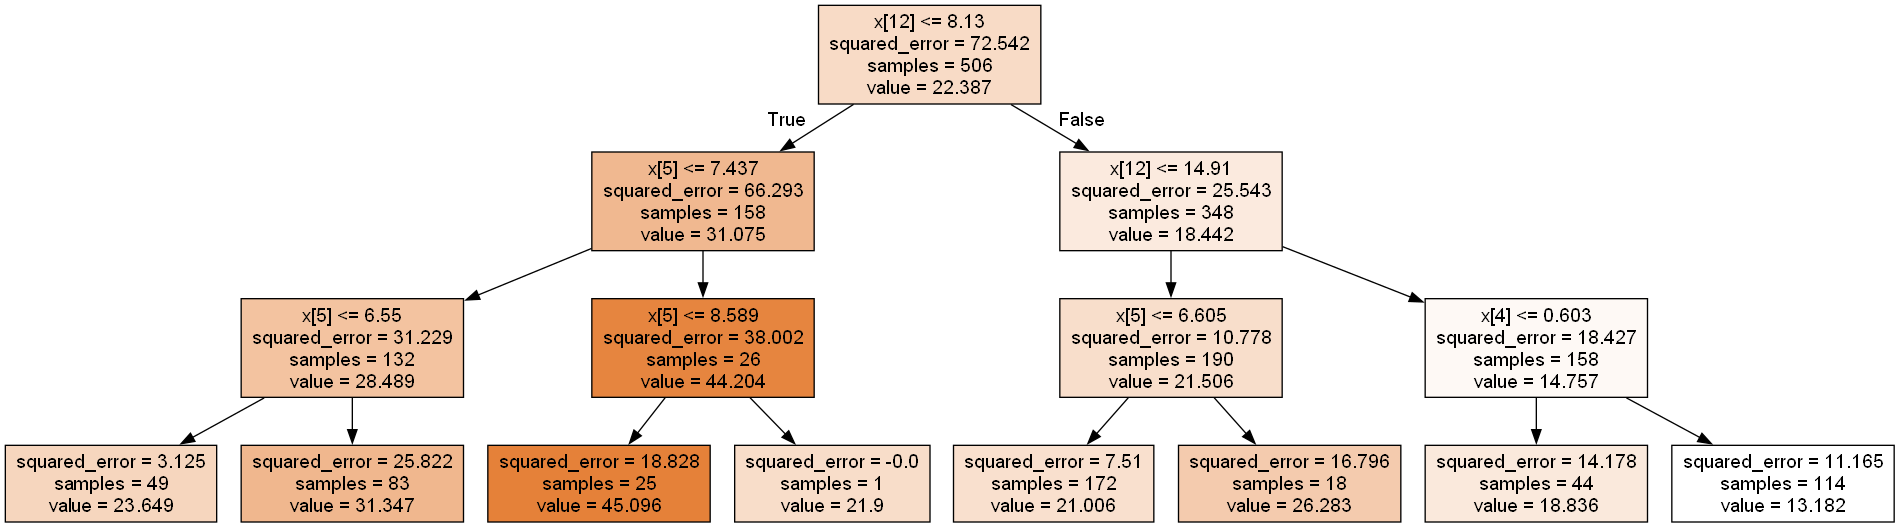

## 4. 第一棵回归树

In [63]:
w1 = np.full(shape = 506,fill_value=1/506)
y1_ = ada[0].predict(X)

In [64]:
# 计算预测值和目标值的误差
error_vector = np.abs(y1_ - y)  # 计算训练集上的误差
error_max = error_vector.max()  # 计算训练集上的最大误差
if error_max != 0:
    error_vector /= error_max   # 归一化0~1  线性误差

# 计算算法误差
estimator_error = (w1 * error_vector).sum()
print('第一棵树误差：',estimator_error)
print('算法误差：',ada.estimator_errors_)

# 计算算法权重
beta = estimator_error / (1. - estimator_error)
estimator_weight =  np.log(1. / beta)
print('第一棵树权重：',estimator_weight)
print('算法权重：', ada.estimator_weights_)

# 根据第一棵树更新权重
w2 = w1 * np.power(beta, (1. - error_vector))
w2 /= w2.sum()

第一棵树误差： 0.1038264158050385
算法误差： [0.10382642 0.14518738 0.16870632]
第一棵树权重： 2.1554137006919016
算法权重： [2.1554137  1.77285711 1.59482367]
